# Levi Boswell

## Research question/interests

With the current information from this dataset dating all the way back to ruffly 1970 and all the way up to the current. I am intrested in seeing and extracting possible patterns in the data that would be helpful in predicting the possible fufture rate of the inflation.

1. Is canada's strategy more or less effective then other similar countries? why?
    - breaking down the data to see how effective canada position is against other similar countries
    - creating a graph plot and extracting patterns from particular time points to determine weather our strategies are improving.
2. Does the G7 nations strategies perform in comparision to other nations?
    - this data set has G7, EU, and G20 also as catagories which we can use to help understand similair patterns that will holfully help explain lighlty why the G7 is performing the way it does.

In [91]:
import pandas as pd 
import numpy as np
datfrm = pd.read_csv('./../data/raw/Inflationdataset.csv')
datfrm.columns.values[6] = "MEAN CPI"
datfrm.groupby("LOCATION").mean()




C:\Users\Levi\AppData\Local\Temp\ipykernel_25708\3470515689.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datfrm.groupby("LOCATION").mean()


,MEAN CPI
LOCATION,
ARG,49.374443
AUS,28.548883
AUT,33.188253
BEL,36.756986
BRA,184.208346
CAN,26.856924
CHE,36.054033
CHL,45.816214
CHN,40.980606


# EDA 
Finding and exploring information that could be useful

In [92]:
#viausl import 
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt

In [93]:
datfrm = pd.read_csv('./../data/raw/Inflationdataset.csv')
datfrm.columns.values[6] = "CPI"
datfrm.describe()

,CPI
count,293470.000000
mean,36.528518
std,77.123971
min,-100.000000
25%,3.028452
50%,12.800525
75%,67.415548
max,6821.312000


In [94]:
datfrm.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI,Flag Codes
0,AUS,CPI,ENRG,AGRWTH,A,1972,4.910070,NaN
1,AUS,CPI,ENRG,AGRWTH,A,1973,3.762801,NaN
2,AUS,CPI,ENRG,AGRWTH,A,1974,13.173540,NaN
3,AUS,CPI,ENRG,AGRWTH,A,1975,19.422470,NaN
4,AUS,CPI,ENRG,AGRWTH,A,1976,8.833195,NaN


In [95]:
datfrm.shape

(293470, 8)

In [96]:
datfrm.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'CPI', 'Flag Codes'],
      dtype='object')

In [97]:
datfrm.nunique(axis=0)

LOCATION          52
INDICATOR          1
SUBJECT            4
MEASURE            2
FREQUENCY          3
TIME            1745
CPI           246286
Flag Codes         1
dtype: int64

In [98]:
## drop colunms that arn't needed 
dat_droped = datfrm.drop( axis=1,columns='Flag Codes')
dat_droped.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI
0,AUS,CPI,ENRG,AGRWTH,A,1972,4.910070
1,AUS,CPI,ENRG,AGRWTH,A,1973,3.762801
2,AUS,CPI,ENRG,AGRWTH,A,1974,13.173540
3,AUS,CPI,ENRG,AGRWTH,A,1975,19.422470
4,AUS,CPI,ENRG,AGRWTH,A,1976,8.833195


In [99]:
#get canadain stats
dat_loc_cpi_CAD = dat_droped[dat_droped['LOCATION'] == 'CAN']
dat_loc_cpi_CAD.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI
518,CAN,CPI,ENRG,AGRWTH,A,1962,-0.436681
519,CAN,CPI,ENRG,AGRWTH,A,1963,-1.608187
520,CAN,CPI,ENRG,AGRWTH,A,1964,0.371471
521,CAN,CPI,ENRG,AGRWTH,A,1965,0.074019
522,CAN,CPI,ENRG,AGRWTH,A,1966,1.183432


In [100]:
#see date format and its non linear format
dat2drop = dat_loc_cpi_CAD[['TIME','CPI']]
dat2drop.max()

dat2drop.reset_index(0)
dat2drop.head(-1)

,TIME,CPI
518,1962,-0.436681
519,1963,-1.608187
520,1964,0.371471
521,1965,0.074019
522,1966,1.183432
...,...,...
197827,Jul-22,118.400400
197828,Aug-22,118.592100
197829,Sep-22,119.053200
197830,Oct-22,119.403400


In [101]:
#dates format changes based on how how far back one goes
grouped  = dat2drop.groupby(dat2drop['TIME'])
df2 = grouped.get_group('1985-Q1')
df2

,TIME,CPI
8255,1985-Q1,5.727798
8499,1985-Q1,3.363454
8931,1985-Q1,3.621170
134075,1985-Q1,3.437004
156050,1985-Q1,44.873150
156298,1985-Q1,48.610050
156734,1985-Q1,48.986040
156982,1985-Q1,49.417770


In [102]:
#get all data by date monthly
#as more interested in most current to date data
group_by_subject =  dat_loc_cpi_CAD.groupby(dat_loc_cpi_CAD['SUBJECT'])
df_g1 = group_by_subject.get_group('ENRG')
df_g1 = df_g1.groupby(df_g1['FREQUENCY']).get_group('M')
df_g1 = df_g1.reset_index()
df_g1


,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI
0,34342,CAN,CPI,ENRG,AGRWTH,M,Jan-62,0.000000
1,34343,CAN,CPI,ENRG,AGRWTH,M,Feb-62,0.000000
2,34344,CAN,CPI,ENRG,AGRWTH,M,Mar-62,0.000000
3,34345,CAN,CPI,ENRG,AGRWTH,M,Apr-62,-0.869565
4,34346,CAN,CPI,ENRG,AGRWTH,M,May-62,0.000000
...,...,...,...,...,...,...,...,...
1471,195032,CAN,CPI,ENRG,IDX2015,M,Aug-22,143.518300
1472,195033,CAN,CPI,ENRG,IDX2015,M,Sep-22,137.228900
1473,195034,CAN,CPI,ENRG,IDX2015,M,Oct-22,145.793100
1474,195035,CAN,CPI,ENRG,IDX2015,M,Nov-22,143.585200


In [103]:
#convert Month-YY -> month->YYYY
def convertDateTime(dataFrame_col):
    date =list()
    for time in dataFrame_col:
        f = str.split(time, '-')
        n = int(f[1])
        if(n <= 22 and n < 1000):
            n += 2000       
        elif(n > 22 and n < 1000):
            n += 1900
        date.append(f"{f[0]}-{n}")
    return date




In [104]:
df_g1["TIME"] = convertDateTime(df_g1["TIME"])
df_g1

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI
0,34342,CAN,CPI,ENRG,AGRWTH,M,Jan-1962,0.000000
1,34343,CAN,CPI,ENRG,AGRWTH,M,Feb-1962,0.000000
2,34344,CAN,CPI,ENRG,AGRWTH,M,Mar-1962,0.000000
3,34345,CAN,CPI,ENRG,AGRWTH,M,Apr-1962,-0.869565
4,34346,CAN,CPI,ENRG,AGRWTH,M,May-1962,0.000000
...,...,...,...,...,...,...,...,...
1471,195032,CAN,CPI,ENRG,IDX2015,M,Aug-2022,143.518300
1472,195033,CAN,CPI,ENRG,IDX2015,M,Sep-2022,137.228900
1473,195034,CAN,CPI,ENRG,IDX2015,M,Oct-2022,145.793100
1474,195035,CAN,CPI,ENRG,IDX2015,M,Nov-2022,143.585200


In [105]:
#get last 4 years
graph_l4_Energy = df_g1.iloc[1416:-1]
graph_l4_Energy

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI
1416,194977,CAN,CPI,ENRG,IDX2015,M,Jan-2018,106.71870
1417,194978,CAN,CPI,ENRG,IDX2015,M,Feb-2018,106.45110
1418,194979,CAN,CPI,ENRG,IDX2015,M,Mar-2018,107.72230
1419,194980,CAN,CPI,ENRG,IDX2015,M,Apr-2018,111.80370
1420,194981,CAN,CPI,ENRG,IDX2015,M,May-2018,113.34260
1421,194982,CAN,CPI,ENRG,IDX2015,M,Jun-2018,111.87060
1422,194983,CAN,CPI,ENRG,IDX2015,M,Jul-2018,112.94120
1423,194984,CAN,CPI,ENRG,IDX2015,M,Aug-2018,111.87060
1424,194985,CAN,CPI,ENRG,IDX2015,M,Sep-2018,111.26850
1425,194986,CAN,CPI,ENRG,IDX2015,M,Oct-2018,109.52890


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, ' CPI value'),
 Text(0.5, 1.0, ' Canadain Energy Sector CPI from 2018-2022')]

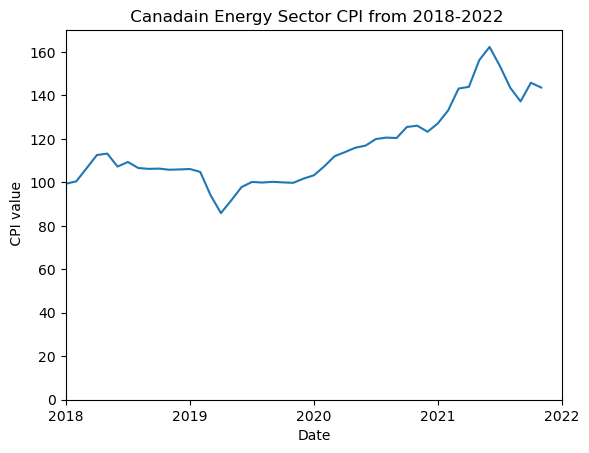

In [106]:
#plot Engery
inlaftion_rate_plot = sns.lineplot(graph_l4_Energy, y='CPI',x='TIME')
bars = (2018,2019,2020,2021,2022)
pos = np.arange(len(bars))
length = [12,24,36,48,60]
plt.xlim(12,60)
plt.xticks(length,bars)
plt.ylim(0,170)
inlaftion_rate_plot.set(xlabel="Date",ylabel=" CPI value", title=' Canadain Energy Sector CPI from 2018-2022')
